In [1]:
from textstat.textstat import textstat
import csv
import pandas
import matplotlib
#matplotlib.style.use('ggplot')
%matplotlib inline
import ast
pandas.options.display.max_colwidth = 100000

## survey size = 5 stories + 1 Gold
## 120 stories total = 24 surveys (24 rows)
## x 2 = 48 rows

In [3]:
GROUP_A = pandas.read_csv('data/FOR_SURVEY/all_cleaned_new_flesch.csv')
GROUP_B = pandas.read_csv('data/FOR_SURVEY/all_redacted_new_flesch.csv')

In [113]:
len(GROUP_A)
len(GROUP_B)

120

 ## Sample Group A: No redaction.

In [128]:
test = GROUP_A.copy()
len(test)
samples = []
for i in xrange(24):
    t = test.sample(5)
    samples.append(t)
    test = test.drop(t.index)


clinton    2
trump      1
cruz       1
sanders    1

Foreign Policy/National Security    2
Campaign Finance                    2
Abortion                            1



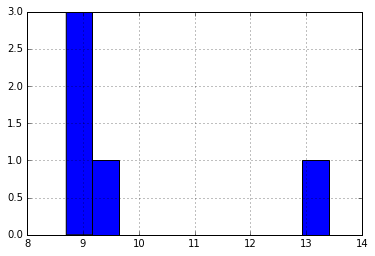


##################################################

cruz       2
trump      1
clinton    1
sanders    1

Foreign Policy/National Security    2
Campaign Finance                    2
Abortion                            1



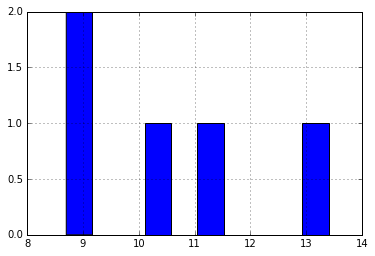


##################################################

clinton    3
cruz       1
sanders    1

Campaign Finance                    3
Foreign Policy/National Security    2



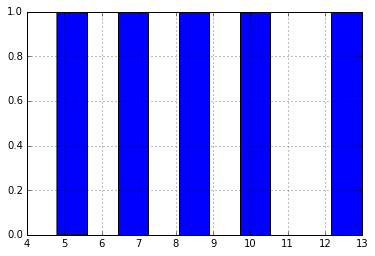


##################################################

clinton    2
trump      1
cruz       1
sanders    1

Campaign Finance    4
Immigration         1



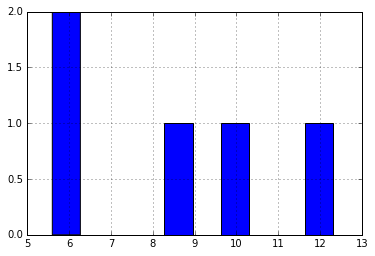


##################################################

sanders    3
trump      1
clinton    1

Campaign Finance                    3
Foreign Policy/National Security    1
Immigration                         1



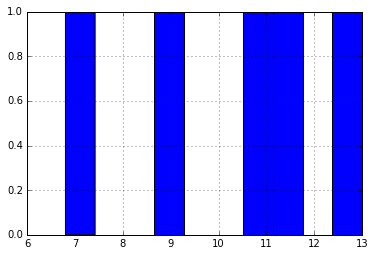


##################################################

sanders    2
trump      1
clinton    1
cruz       1

Immigration                         2
Campaign Finance                    2
Foreign Policy/National Security    1



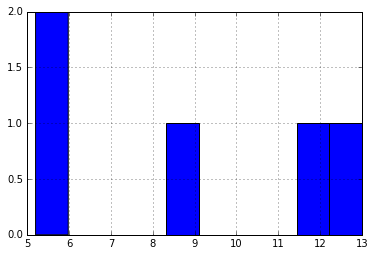


##################################################

cruz       2
trump      2
clinton    1

Campaign Finance                    3
Foreign Policy/National Security    1
Immigration                         1



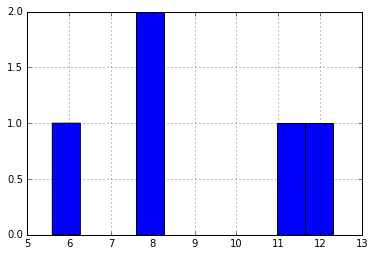


##################################################

cruz       2
trump      2
sanders    1

Immigration                         2
Campaign Finance                    2
Foreign Policy/National Security    1



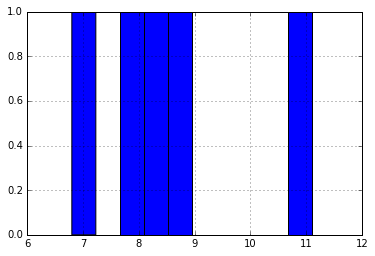


##################################################

trump      3
sanders    1
cruz       1

Immigration                         3
Foreign Policy/National Security    1
Campaign Finance                    1



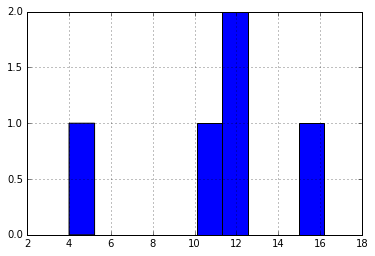


##################################################

cruz       2
sanders    2
clinton    1

Campaign Finance    3
Abortion            1
Immigration         1



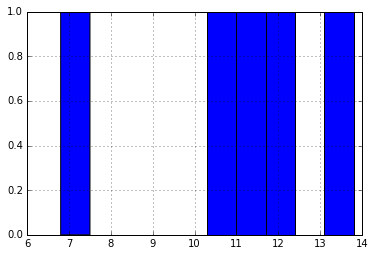


##################################################

cruz       2
sanders    2
clinton    1

Campaign Finance    4
Immigration         1



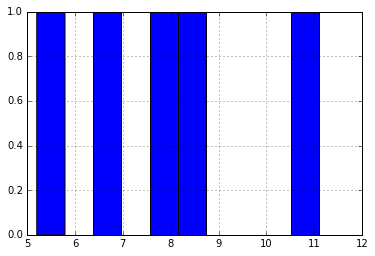


##################################################

clinton    3
sanders    1
trump      1

Campaign Finance                    2
Abortion                            2
Foreign Policy/National Security    1



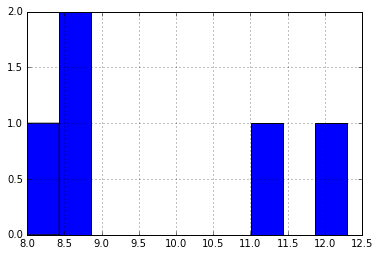


##################################################

sanders    2
clinton    2
cruz       1

Immigration         3
Campaign Finance    1
Abortion            1



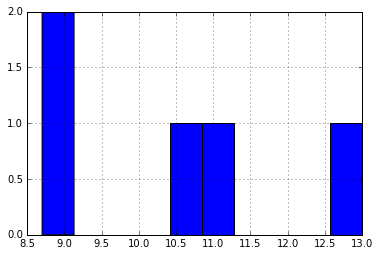


##################################################

trump      3
cruz       1
clinton    1

Immigration                         2
Abortion                            1
Foreign Policy/National Security    1
Campaign Finance                    1



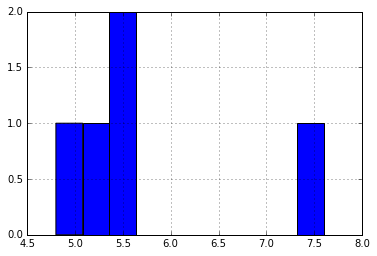


##################################################

trump    3
cruz     2

Foreign Policy/National Security    2
Campaign Finance                    2
Abortion                            1



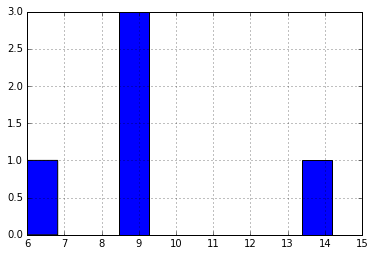


##################################################

trump      2
clinton    1
cruz       1
sanders    1

Immigration                         2
Campaign Finance                    2
Foreign Policy/National Security    1



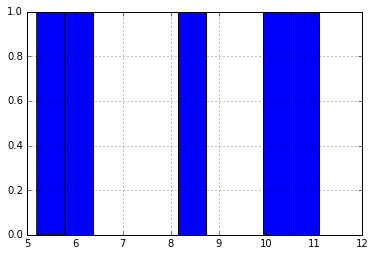


##################################################

trump      2
clinton    1
cruz       1
sanders    1

Campaign Finance                    4
Foreign Policy/National Security    1



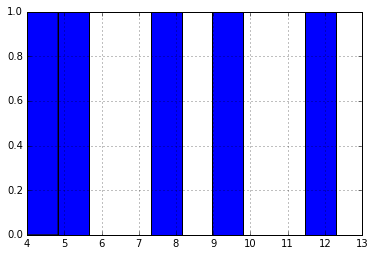


##################################################

cruz       3
sanders    1
trump      1

Campaign Finance    3
Abortion            2



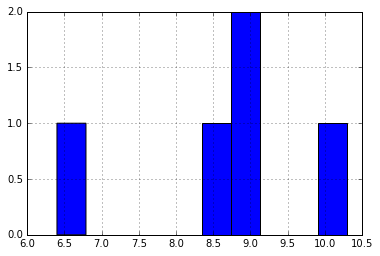


##################################################

clinton    3
cruz       1
trump      1

Foreign Policy/National Security    2
Campaign Finance                    2
Immigration                         1



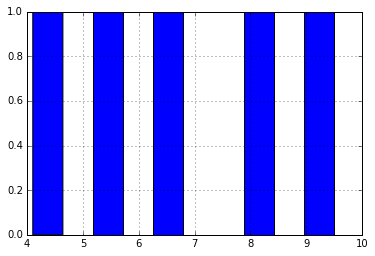


##################################################

cruz       2
trump      1
clinton    1
sanders    1

Immigration                         2
Campaign Finance                    2
Foreign Policy/National Security    1



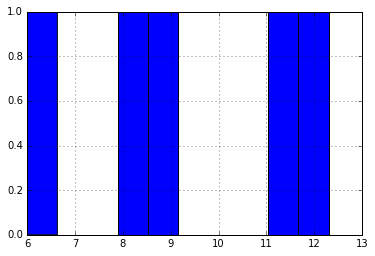


##################################################

sanders    2
clinton    2
trump      1

Campaign Finance                    3
Foreign Policy/National Security    1
Immigration                         1



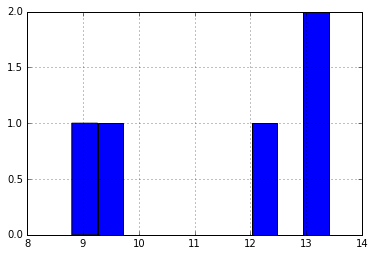


##################################################

sanders    2
clinton    2
trump      1

Foreign Policy/National Security    2
Immigration                         2
Campaign Finance                    1



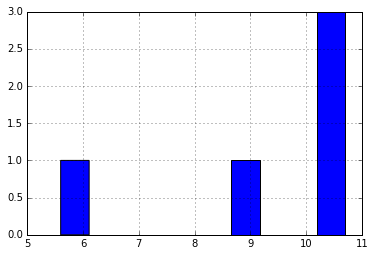


##################################################

sanders    2
cruz       2
trump      1

Immigration         3
Campaign Finance    2



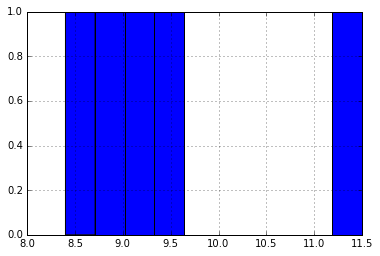


##################################################

sanders    2
trump      1
clinton    1
cruz       1

Immigration         3
Campaign Finance    2



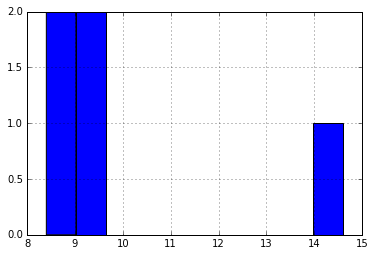


##################################################


In [129]:
for s in samples:
    print 
    print s.candidate.value_counts().to_string()
    print
    print s.top_topic.value_counts().to_string()
    print 
    s.flesch_new.hist()
    matplotlib.pyplot.show()
    print
    print '#' * 50 

In [131]:
for i in xrange(len(samples)):
    samples[i].to_csv('../../SURVEY/DATA/GROUP_A/sample' + str(i) + '.csv')

In [132]:
samples[0].columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'title', u'url', u'candidate', u'org',
       u'top_topic', u'flesch', u'gunning_fog', u'body', u'gunning_fog_new',
       u'flesch_new', u'readability', u'flesch_diff'],
      dtype='object')

In [234]:
t = samples[0]
t.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'title', u'url', u'candidate', u'org',
       u'top_topic', u'flesch', u'gunning_fog', u'body', u'gunning_fog_new',
       u'flesch_new', u'readability', u'flesch_diff'],
      dtype='object')

In [229]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [235]:
import csv 
with open('../../SURVEY/DATA/test.csv', "wb") as f:
    c = csv.writer(f) 
    x = [[row[0]] + list(row[1].values) for row in t.iterrows()]
    #for row in t.iterrows():
    #c.writerow([])
    c.writerow(flatten(x)) 

In [233]:
flatstanley = flatten(x)
flatstanley

[8,
 8,
 1477,
 'First Draft: Bernie Sanders Promises to Keep Pressing the Campaign',
 'http://www.nytimes.com/politics/first-draft/2016/02/29/bernie-sanders-promises-to-keep-pressing-the-campaign/',
 'sanders',
 'nyt',
 'Campaign Finance',
 8.7,
 10.0,
 'BOSTON \xe2\x80\x94 Senator Bernie Sanders of Vermont vowed on Monday night that no matter the outcome of the Super Tuesday races, his campaign would continue to rally voters against a political establishment that is largely backing his rival, Hillary Clinton.\n\nMr. Sanders, standing next to a chartered plane here, said he would \xe2\x80\x9clikely\xe2\x80\x9d win Vermont\xe2\x80\x99s vote, and also felt good about his chances for winning the most delegates in Oklahoma, Minnesota, Colorado and Massachusetts. He also said he might take a large number of delegates in Texas.\n\n\xe2\x80\x9cWe started this campaign at 3 percent in the polls \xe2\x80\x94 60 or 70 points behind Hillary Clinton,\xe2\x80\x9d Mr. Sanders said to more than a do

In [166]:
y[2][0]

105